In [1]:
import torch

import sys
import os

sys.path.append(os.path.abspath(".."))
from models.mobilenetv3 import MobileNetV3Extractor

In [2]:
dummy_input = torch.randn(2, 30, 3, 224, 224)  # [B, T, C, H, W]
print("simulate input shape:", dummy_input.shape)

simulate input shape: torch.Size([2, 30, 3, 224, 224])


In [3]:
model = MobileNetV3Extractor()
model.eval()

with torch.no_grad():
    features = model(dummy_input)

print("output shape", features.shape)  # [2, 30, D]

/opt/anaconda3/envs/slr-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/slr-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


output shape torch.Size([2, 30, 960])


single frame feature shape: torch.Size([960])


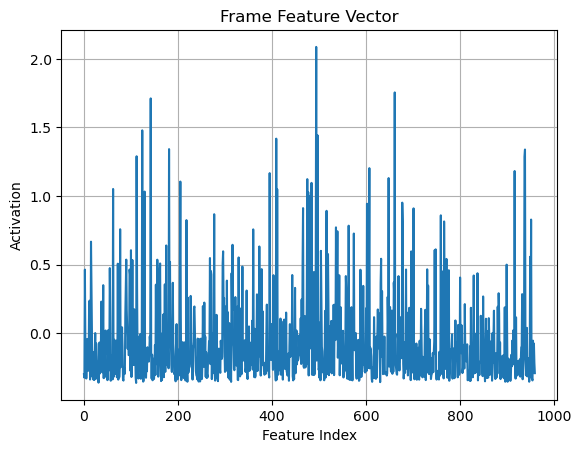

In [4]:
import matplotlib.pyplot as plt

# The first video, features of the first frame
frame_vector = features[0, 0]  # shape [D]
print("single frame feature shape:", frame_vector.shape)

plt.plot(frame_vector.numpy())
plt.title("Frame Feature Vector")
plt.xlabel("Feature Index")
plt.ylabel("Activation")
plt.grid(True)
plt.show()

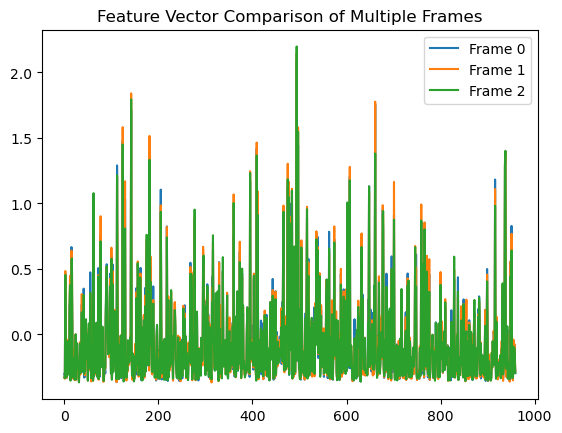

In [5]:
for i in range(3):
    vec = features[0, i].cpu().numpy()
    plt.plot(vec, label=f"Frame {i}")
plt.legend()
plt.title("Feature Vector Comparison of Multiple Frames")
plt.show()